In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [707]:
# 1970 - 1989
df1 = pd.read_csv('all_1970_1989.csv')

# 1990 - 1999
df2 = pd.read_csv('all_1990_1999.csv')

df = pd.concat([df1,df2],ignore_index=True)

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270326 entries, 0 to 270325
Data columns (total 12 columns):
date          270326 non-null object
TAVG          114713 non-null float64
TMAX          229776 non-null float64
TMIN          220050 non-null float64
PRCP          216792 non-null float64
SNOW          153890 non-null float64
SNWD          154642 non-null float64
station_id    270326 non-null object
lat           270326 non-null float64
lon           270326 non-null float64
code          270326 non-null object
country       270326 non-null object
dtypes: float64(8), object(4)
memory usage: 24.7+ MB


In [494]:
# convert the format
df['date'] = pd.to_datetime(df['date'])

In [651]:
df.columns

Index(['date', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'station_id',
       'lat', 'lon', 'code', 'country'],
      dtype='object')

In [496]:
# how many missing days for each country
def days_missed(df):
    result = []
    countries = df['country'].unique()
    date_range = pd.date_range(start = '1970-01-01', end = '1999-12-31')
    total_days = len(date_range)
    
    for country in countries:
        temp = df[df['country'] == country]
        days = len(date_range.difference(temp['date']))
        per = round(days/total_days,2)
        result.append([country,days,per])
    return pd.DataFrame(result,columns=['country','days_missed','percentage']).sort_values('days_missed')
    
days_missed_result = days_missed(df)  
days_missed_result

,country,days_missed,percentage
0,American Samoa [United States],0,0.00
25,United States,0,0.00
20,Puerto Rico [United States],0,0.00
19,Marshall Islands,0,0.00
18,Palau,0,0.00
10,Guam [United States],0,0.00
9,Germany,0,0.00
28,Wake Island [United States],0,0.00
7,Federated States of Micronesia,0,0.00
12,Iceland,1,0.00


In [497]:
# for the coutries with 0 missing days, check the missing data percentage of each variable
def countries_fulldays(the_df,df):
    result = pd.DataFrame(columns=df.columns)
    fulldays = the_df[the_df['days_missed'] == 0]['country'].copy()
    for country in fulldays:
        new = df[df['country'] == country].isnull().sum()
        new['country'] = country
        result = result.append(new,ignore_index=True)
        
    return result

countries_fulldays(days_missed_result,df)

,date,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD,station_id,lat,lon,code,country
0,0,10957,0,0,0,0,0,0,0,0,0,American Samoa [United States]
1,0,10317,0,0,0,24,35,0,0,0,0,United States
2,0,10319,0,0,3,26,19,0,0,0,0,Puerto Rico [United States]
3,0,10957,0,0,0,0,0,0,0,0,0,Marshall Islands
4,0,10957,0,0,0,0,0,0,0,0,0,Palau
5,0,10865,3,0,0,0,0,0,0,0,0,Guam [United States]
6,0,770,0,0,0,10957,1,0,0,0,0,Germany
7,0,10957,9,10,12,0,31,0,0,0,0,Wake Island [United States]
8,0,10957,0,0,0,0,1,0,0,0,0,Federated States of Micronesia


In [498]:
# work with countries with no missing values except TAVG, and calculate TAVG by (min+max)/2
the_countries = ['American Samoa [United States]','Marshall Islands','Palau']

dfa = df[df['country'].isin(the_countries)].copy()
dfa['TAVG'] = dfa.apply(lambda x: (x['TMAX']+x['TMIN'])/2 if pd.isna(x['TAVG']) else x['TAVG'], axis=1)

In [499]:
# create year and month column
dfa['year'] = pd.DatetimeIndex(dfa['date']).year
dfa['month'] = pd.DatetimeIndex(dfa['date']).month

In [500]:
# create diff column represents the diff between max temp and min temp
dfa['diff'] = dfa['TMAX'] - dfa['TMIN']

In [501]:
dfa_final = dfa.groupby(['year','month','lat','lon']).mean().reset_index()

----

---

In [592]:
temp_countries = ['American Samoa [United States]','United States','Puerto Rico [United States]','Marshall Islands','Palau','Guam [United States]','Federated States of Micronesia']

In [593]:
dfb = df[df['country'].isin(temp_countries)].copy()
dfb['TAVG'] = dfb.apply(lambda x: (x['TMAX']+x['TMIN'])/2 if pd.isna(x['TAVG']) else x['TAVG'], axis=1)

In [594]:
dfb = dfb.dropna()

In [595]:
dfb['year'] = pd.DatetimeIndex(dfb['date']).year
dfb['month'] = pd.DatetimeIndex(dfb['date']).month

In [599]:
dfb_temp = dfb.groupby(['country','year','lat','lon'])['TAVG'].mean().reset_index()

In [600]:
dfb_temp.sample(3)

,country,year,lat,lon,TAVG
70,Guam [United States],1980,13.4836,144.7961,26.041257
154,Puerto Rico [United States],1974,18.4325,-66.0108,27.057671
56,Federated States of Micronesia,1996,7.4500,151.8333,27.515027


In [625]:
diff_map = pd.DataFrame(columns = ['country','lat','lon','diff'])
diff_map['country'] = dfb_temp['country'].unique()
for i in dfb_temp['country'].unique():
    first_year = pd.to_numeric(dfb_temp[(dfb_temp['country'] == i )& (dfb_temp['year'] == 1970)]['TAVG']).to_numpy()[0]
    last_year = pd.to_numeric(dfb_temp[(dfb_temp['country'] == i )& (dfb_temp['year'] == 1999)]['TAVG']).to_numpy()[0]
    
    diff = last_year - first_year

    lat = pd.to_numeric(dfb_temp[dfb_temp['country'] == i]['lat'].unique())[0]
    lon = pd.to_numeric(dfb_temp[dfb_temp['country'] == i]['lon'].unique())[0]


    diff_map.loc[diff_map['country']==i,'lon'] = lon
    diff_map.loc[diff_map['country']==i,'lat'] = lat
    diff_map.loc[diff_map['country']==i,'diff'] = diff

In [630]:
from shapely.geometry import Point
from geopandas import GeoDataFrame

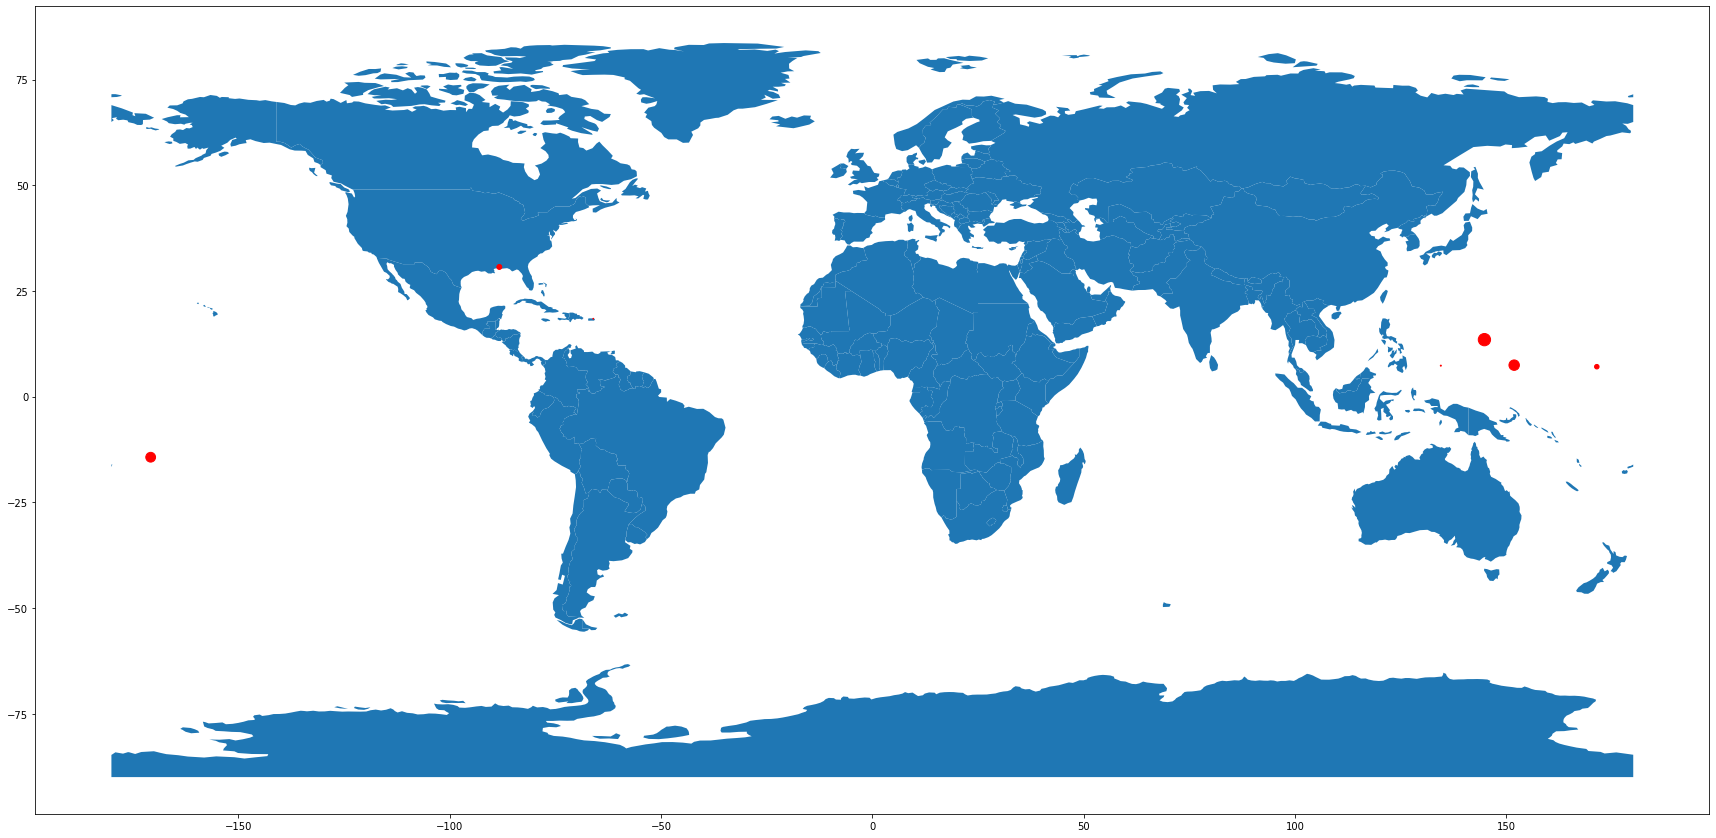

In [705]:
# plot those stations on map
geometry = [Point(xy) for xy in zip(diff_map['lon'], diff_map['lat'])]
gdf = GeoDataFrame(geometry=geometry)  
gdf['diff'] = diff_map['diff'].astype('float')

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(30, 18)), marker='o', color='red',markersize=np.abs(gdf['diff']*100));


In [585]:
diff_map.loc[diff_map['country']=='AQ','lat']

0    NaN
Name: lat, dtype: object

### building models

In [502]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [503]:
dfa_final['country'] = dfa_final['lat'].map({-14.3306:'American Samoa', 7.0833:'Marshall Islands',7.3333:'Palau'})

In [504]:
X = dfa_final.drop(['lat','lon','SNOW','SNWD','country'],axis=1)
y = dfa_final['country']

In [331]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33)

In [328]:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)

RandomForestClassifier()

In [329]:
rdf.score(X_train,y_train)

1.0

In [332]:
rdf.score(X_test,y_test)

0.8296296296296296

## 2

In [333]:
dfa_final.head()

,year,month,lat,lon,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD,diff,country
0,1970,1,-14.3306,-170.7136,27.170968,30.761290,23.580645,7.732258,0.0,0.0,7.180645,American Samoa
1,1970,1,7.0833,171.3833,27.332258,29.380645,25.283871,4.609677,0.0,0.0,4.096774,Marshall Islands
2,1970,1,7.3333,134.4833,27.459677,30.961290,23.958065,5.103226,0.0,0.0,7.003226,Palau
3,1970,2,-14.3306,-170.7136,27.605357,30.796429,24.414286,8.053571,0.0,0.0,6.382143,American Samoa
4,1970,2,7.0833,171.3833,27.758929,29.692857,25.825000,0.371429,0.0,0.0,3.867857,Marshall Islands


In [366]:
dfa_final_a = dfa_final[dfa_final['country'] == 'Palau'].copy()
X = dfa_final_a[['lat','lon','year','month','PRCP']]
y = dfa_final_a['TAVG']

In [367]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33)

In [368]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [369]:
linreg.score(X_train,y_train)

0.29991214884836415

In [370]:
linreg.score(X_test,y_test)

0.15141190715348607

In [349]:
X

,TAVG,TMAX,TMIN,PRCP,diff,country_Marshall Islands,country_Palau
0,27.170968,30.761290,23.580645,7.732258,7.180645,0,0
1,27.332258,29.380645,25.283871,4.609677,4.096774,1,0
2,27.459677,30.961290,23.958065,5.103226,7.003226,0,1
3,27.605357,30.796429,24.414286,8.053571,6.382143,0,0
4,27.758929,29.692857,25.825000,0.371429,3.867857,1,0
...,...,...,...,...,...,...,...
1075,27.533333,29.693333,25.373333,14.630000,4.320000,1,0
1076,28.200000,32.113333,24.286667,8.050000,7.826667,0,1
1077,28.640323,31.951613,25.329032,10.251613,6.622581,0,0
1078,27.590323,29.535484,25.645161,8.074194,3.890323,1,0


## 3

In [465]:
df_temp = df.copy()

In [466]:
df_temp['TAVG'] = df_temp.apply(lambda x: (x['TMAX'] + x['TMIN'])/2 if pd.isna(x['TAVG']) else x['TAVG'],axis=1)

In [468]:
df_temp = df_temp.dropna()

In [478]:
df_temp['diff'] = df_temp.apply(lambda x: x['TMAX'] - x['TMIN'],axis=1)

In [479]:
df_temp['month'] = pd.DatetimeIndex(df_temp['date']).month
df_temp['year'] = pd.DatetimeIndex(df_temp['date']).year

In [462]:
df_temp = df_temp.groupby(['year','month']).mean().reset_index(drop=True)

In [491]:
df_temp['dec'] = df_temp['year']//10*10

In [516]:
X = df_temp[['TAVG','TMAX','TMIN','PRCP','SNOW','SNWD','code','diff','month']]
y = df_temp['dec'].astype('category')

In [517]:
X = pd.get_dummies(X,drop_first=True)

In [518]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33)

In [519]:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)

RandomForestClassifier()

In [520]:
rdf.score(X_train,y_train)

0.8366006276229725

In [521]:
rdf.score(X_test,y_test)

0.4990642545227698

In [526]:
# 2

In [527]:
X = df_temp[['TAVG','TMAX','TMIN','PRCP','SNOW','SNWD','diff','month']]
y = df_temp['year'].astype('category')

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33)

rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)

RandomForestClassifier()

In [553]:
import geopandas
# shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
# #Read shapefile using Geopandas
# gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
# #Rename columns.
# gdf.columns = ['country', 'country_code', 'geometry']
# gdf.head()

In [532]:
world = gpd.read_file(shapefile)

In [539]:
df['country'].unique()

array(['American Samoa [United States]', 'Antarctica',
       'Bermuda [United Kingdom]', 'Solomon Islands', 'Canada',
       'Cayman Islands [United Kingdom]', 'Cuba',
       'Federated States of Micronesia', 'Greenland [Denmark]', 'Germany',
       'Guam [United States]', 'Guyana', 'Iceland', 'Italy', 'Japan',
       'Laos', 'Morocco', 'Portugal', 'Palau', 'Marshall Islands',
       'Puerto Rico [United States]', 'Saudi Arabia', 'Spain', 'Thailand',
       'United Kingdom', 'United States', 'Vietnam',
       'Virgin Islands [United States]', 'Wake Island [United States]'],
      dtype=object)

In [537]:
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,í¼ì§,Fiji,FidÅ¼i,Fiji,Ð¤Ð¸Ð´Ð¶Ð¸,Fiji,Fiji,Fiji,ææ¿,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,íìëì,Tanzania,Tanzania,TanzÃ¢nia,Ð¢Ð°Ð½Ð·Ð°Ð½Ð¸Ñ,Tanzania,Tanzanya,Tanzania,å¦æ¡å°¼äº,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,ìì¬íë¼,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,ÐÐ°Ð¿Ð°Ð´Ð½Ð°Ñ Ð¡Ð°Ñ Ð°ÑÐ°,VÃ¤stsahara,BatÄ± Sahra,TÃ¢y Sahara,è¥¿æåæ,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [559]:
df['country'].unique()

array(['American Samoa [United States]', 'Antarctica',
       'Bermuda [United Kingdom]', 'Solomon Islands', 'Canada',
       'Cayman Islands [United Kingdom]', 'Cuba',
       'Federated States of Micronesia', 'Greenland [Denmark]', 'Germany',
       'Guam [United States]', 'Guyana', 'Iceland', 'Italy', 'Japan',
       'Laos', 'Morocco', 'Portugal', 'Palau', 'Marshall Islands',
       'Puerto Rico [United States]', 'Saudi Arabia', 'Spain', 'Thailand',
       'United Kingdom', 'United States', 'Vietnam',
       'Virgin Islands [United States]', 'Wake Island [United States]'],
      dtype=object)

In [652]:
temp_countries = ['American Samoa [United States]','United States','Puerto Rico [United States]','Marshall Islands','Palau','Guam [United States]','Federated States of Micronesia']

In [673]:
dfb = df[df['country'].isin(temp_countries)].copy()
dfb['TAVG'] = dfb.apply(lambda x: (x['TMAX']+x['TMIN'])/2 if pd.isna(x['TAVG']) else x['TAVG'], axis=1)

In [674]:
dfb = dfb.dropna()

In [675]:
dfb['year'] = pd.DatetimeIndex(dfb['date']).year
dfb['month'] = pd.DatetimeIndex(dfb['date']).month

In [676]:
dfb.head()

,date,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD,station_id,lat,lon,code,country,year,month
0,1970-01-01,26.15,30.6,21.7,0.0,0.0,0.0,GHCND:AQW00061705,-14.3306,-170.7136,AQ,American Samoa [United States],1970,1
1,1970-01-02,26.65,31.1,22.2,10.2,0.0,0.0,GHCND:AQW00061705,-14.3306,-170.7136,AQ,American Samoa [United States],1970,1
2,1970-01-03,26.70,30.6,22.8,9.4,0.0,0.0,GHCND:AQW00061705,-14.3306,-170.7136,AQ,American Samoa [United States],1970,1
3,1970-01-04,26.10,29.4,22.8,11.7,0.0,0.0,GHCND:AQW00061705,-14.3306,-170.7136,AQ,American Samoa [United States],1970,1
4,1970-01-05,26.40,30.6,22.2,0.0,0.0,0.0,GHCND:AQW00061705,-14.3306,-170.7136,AQ,American Samoa [United States],1970,1


In [677]:
for_nic = dfb.groupby(['country','year','month','lat','lon']).mean().reset_index()

In [680]:
for_nic.to_csv('for_nic.csv',index=False)